In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '../../data/processed_data/monthly_domain_average/'
file_str_nonrr = 'on_lev_nonrr_night_cm*'
file_str_rr = 'on_lev_rr_night_cm*'

ds_nonrr = xr.open_mfdataset(f'{path}{file_str_nonrr}')
ds_rr = xr.open_mfdataset(f'{path}{file_str_rr}')

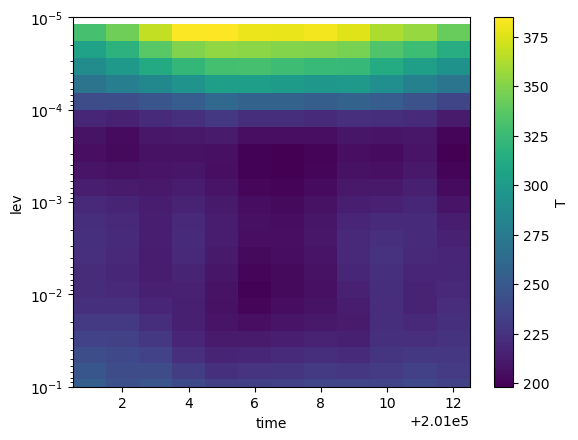

In [4]:
ds_rr['T'].sel(lev=slice(1e-5,1e-1)).plot(y='lev',yscale='log',ylim=[1e-1,1e-5])

In [5]:
import sys
sys.path.append("../../helpers/")
import P_to_GPH_ncol
import importlib
importlib.reload(P_to_GPH_ncol)

<module 'P_to_GPH_ncol' from 'C:\\Users\\phymku\\Desktop\\WP5\\WACCM-RR\\analysis\\monthly_domain_average\\../../helpers\\P_to_GPH_ncol.py'>

In [6]:
ds_in = ds_rr[['T']]
ds_z = P_to_GPH_ncol.P_to_GPH_ncol(ds_in)

Integrating it, 11  ncol  0  lev  0  progress  99.17  %   
That took  27.47 seconds


In [27]:
out = ds_z[['z','gph']].copy()

In [28]:
path_out = './'
filename_out = 'rr_diur_cm_z_gph_2010.nc'
out.to_netcdf(path_out + filename_out)